# Lab 1

In [38]:
%%capture
import sys
!{sys.executable} -m pip install --user scipy numpy matplotlib pandas

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

import numpy as np
import pandas as pd
from scipy import stats

## Standard Normal Distribution, μ=0, σ=1

The standard normal distribution is the Gaussian distribution of a random variable of mean $\mu=0$ and standard deviation $\sigma=1$. When a value lies outside the mean, the distance from the mean to the value can be expressed as a multiple of the standard deviation, usually called the "z-score". Thus a value with a "z-score of 2" or one that lies "2 sigma" from the mean corresponds to the point located $2\sigma$ from $\mu$.

The probability that a number from the distribution lies within a particular range of z-scores is found by integrating the Gaussian function from one z-score to the other. For example, the probability that a value lies $1\sigma$ from the mean is the integral of the standard normal probability density function (PDF) from -1 to 1. Similarly, since the integral over the entire PDF is equal to 1, the probability that a value lies within $-\infty\sigma$ to $+\infty\sigma$ is 100%.

Integrating Gaussian PDFs is usually not a pleasant task, so values for various z-scores have been tabulated. The following is a Z table for the standard normal distribution, which gives the probability that a value may lie between 0 and z. The far left column is the larger portion of the z-score, and the upper row is the smaller portion. To find the probability that a value lies within 0 and 0.75, for example, we locate the element of the table at row 8 (0.7), column 6 (0.05), which is 0.27337. Thus the probability is about 27%.

| z   | +0.00   | +0.01   | +0.02   | +0.03   | +0.04   | +0.05   | +0.06   | +0.07   | +0.08   | +0.09   |
|-----|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0.0 | 0.00000 | 0.00399 | 0.00798 | 0.01197 | 0.01595 | 0.01994 | 0.02392 | 0.02790 | 0.03188 | 0.03586 |
| 0.1 | 0.03983 | 0.04380 | 0.04776 | 0.05172 | 0.05567 | 0.05962 | 0.06356 | 0.06749 | 0.07142 | 0.07535 |
| 0.2 | 0.07926 | 0.08317 | 0.08706 | 0.09095 | 0.09483 | 0.09871 | 0.10257 | 0.10642 | 0.11026 | 0.11409 |
| 0.3 | 0.11791 | 0.12172 | 0.12552 | 0.12930 | 0.13307 | 0.13683 | 0.14058 | 0.14431 | 0.14803 | 0.15173 |
| 0.4 | 0.15542 | 0.15910 | 0.16276 | 0.16640 | 0.17003 | 0.17364 | 0.17724 | 0.18082 | 0.18439 | 0.18793 |
| 0.5 | 0.19146 | 0.19497 | 0.19847 | 0.20194 | 0.20540 | 0.20884 | 0.21226 | 0.21566 | 0.21904 | 0.22240 |
| 0.6 | 0.22575 | 0.22907 | 0.23237 | 0.23565 | 0.23891 | 0.24215 | 0.24537 | 0.24857 | 0.25175 | 0.25490 |
| 0.7 | 0.25804 | 0.26115 | 0.26424 | 0.26730 | 0.27035 | 0.27337 | 0.27637 | 0.27935 | 0.28230 | 0.28524 |
| 0.8 | 0.28814 | 0.29103 | 0.29389 | 0.29673 | 0.29955 | 0.30234 | 0.30511 | 0.30785 | 0.31057 | 0.31327 |
| 0.9 | 0.31594 | 0.31859 | 0.32121 | 0.32381 | 0.32639 | 0.32894 | 0.33147 | 0.33398 | 0.33646 | 0.33891 |
| 1.0 | 0.34134 | 0.34375 | 0.34614 | 0.34849 | 0.35083 | 0.35314 | 0.35543 | 0.35769 | 0.35993 | 0.36214 |

Source: https://en.wikipedia.org/wiki/Standard_normal_table

Let's replicate this table with Python. SciPy provides us with a *cumulative distribution function* `cdf` that integrates the PDF from $-\infty$ to z. Since we want to integrate from 0 to z, we subtract the integral over $-\infty$ to 0 from the integral over $-\infty$ to z.

In [41]:
large_increments = np.linspace(0, 1, 11)
small_increments = np.linspace(0, 0.09, 10)
table = np.zeros((len(large_increments), len(small_increments)))

for i in range(len(large_increments)):
    for j in range(len(small_increments)):
        table[i][j] = stats.norm.cdf(large_increments[i] + small_increments[j]) - stats.norm.cdf(0)

pd.DataFrame(table, columns=small_increments, index=large_increments)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.000000,0.003989,0.007978,0.011966,0.015953,0.019939,0.023922,0.027903,0.031881,0.035856
0.1,0.039828,0.043795,0.047758,0.051717,0.055670,0.059618,0.063559,0.067495,0.071424,0.075345
0.2,0.079260,0.083166,0.087064,0.090954,0.094835,0.098706,0.102568,0.106420,0.110261,0.114092
0.3,0.117911,0.121720,0.125516,0.129300,0.133072,0.136831,0.140576,0.144309,0.148027,0.151732
0.4,0.155422,0.159097,0.162757,0.166402,0.170031,0.173645,0.177242,0.180822,0.184386,0.187933
0.5,0.191462,0.194974,0.198468,0.201944,0.205401,0.208840,0.212260,0.215661,0.219043,0.222405
0.6,0.225747,0.229069,0.232371,0.235653,0.238914,0.242154,0.245373,0.248571,0.251748,0.254903
0.7,0.258036,0.261148,0.264238,0.267305,0.270350,0.273373,0.276373,0.279350,0.282305,0.285236
0.8,0.288145,0.291030,0.293892,0.296731,0.299546,0.302337,0.305105,0.307850,0.310570,0.313267
0.9,0.315940,0.318589,0.321214,0.323814,0.326391,0.328944,0.331472,0.333977,0.336457,0.338913


Now let's convert probabilities to the form $X\sigma$.

The probability that a value that lies $1\sigma$ to the left of the mean is about 0.1587, for $2\sigma$ away it's 0.0227, and for $5\sigma$ away it's 2.8665\*10<sup>-7</sup>. To find the z-score of these probabilities, we use the *percent-point function* `ppf`.

In [42]:
probabilities = np.array([0.1587, 0.0227, 2.8665e-07])
print(stats.norm.ppf(probabilities))

[-0.99981509 -2.00092939 -5.00000106]


Great - these are approximately $1\sigma$, $2\sigma$, and $5\sigma$, as expected. The negative sign on each value indicates that it falls to the left of the mean (which is at 0). Since we're integrating the PDF starting at $-\infty$, we expect to end up on the left of the mean as long as the desired probability is less than 0.5.

## Lognormal distribution, μ=0, σ=0.25

The lognormal distribution is essentially $e$ raised to a Gaussian distribution. In other words, the log of the distribution is normal (hence the name *lognormal*). In terms of the math, a value $A$ in the lognormal distribution is equal to $e^{\mu+\sigma Z}$ for a normally-distributed value $Z$.

First, let's plot a histogram of some lognormally distributed data, as well as the PDF for the distribution. We'll define our distribution using the parameters $\mu=0$ and $\sigma=0.25$.

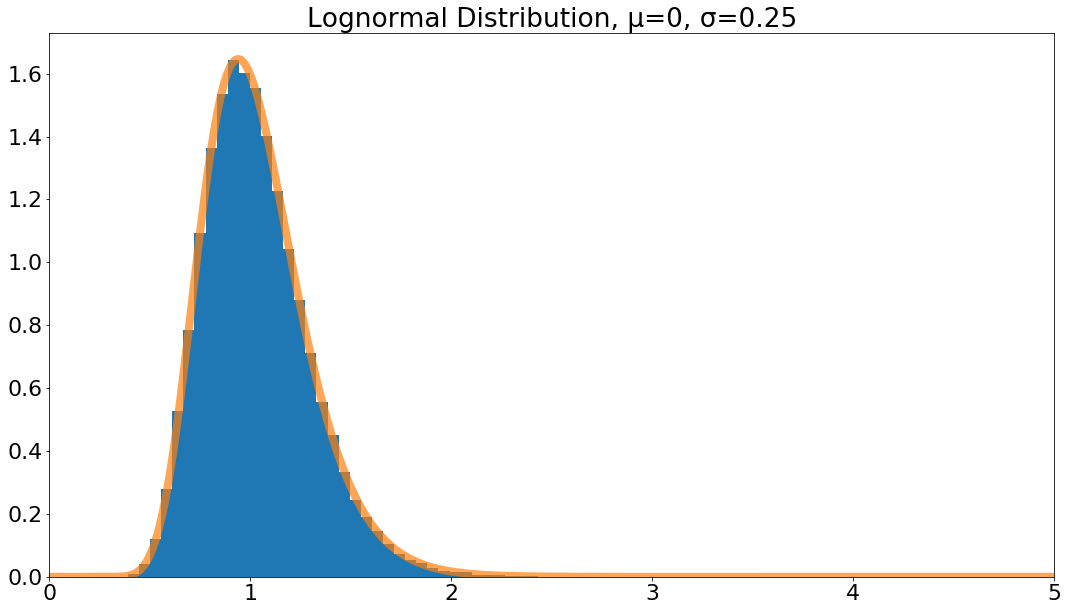

In [43]:
dist = stats.lognorm(0.25, 0)
samples = dist.rvs(100_000)

plt.title("Lognormal Distribution, μ=0, σ=0.25")
plt.hist(samples, 50, density=True)
plt.xlim([0, 5])
x = np.linspace(0, 5, 1000)
plt.plot(x, dist.pdf(x), linewidth = 8, alpha = 0.7);

Now let's examine what it means to find a probability of $X\sigma$ when our data is not Gaussian.

Consider the case of a measurement of some quantity where one may either receive a signal or receive no signal. Let's choose an arbitrary signal threshold for this hypothetical measurement: 2. Thus, a measurement that has the value 2 can be considered "signal-like", with a value less than 2 it is "not signal-like", and with a value greater than 2 it is "more signal-like". Now we can ask a statistical question about the probability of finding a signal in some supposedly signal-free background data:

Given that our signal-free data is lognormally distributed, what is the probability that we find a value that is as signal-like or more signal-like than 2 in the signal-free data?

We must integrate the PDF for the distribution: $\int\limits_{2}^{\infty} \frac{1}{x\sigma\sqrt{2\pi}} \exp \left(-\frac{(\ln{x} - \mu)^2}{2\sigma^2}\right) dx$ with $\mu = 0, \sigma = 0.25$

Since we want to integrate from 2 to $\infty$, we can use something called the *survival function*, which is defined to be one minus the CDF (that is, it integrates the PDF from z to $\infty$).

In [44]:
dist.sf(2)

0.002780617862309522

This probability is about 0.28%. Let's convert it to the form $X\sigma$ using the `ppf` function.

In [45]:
stats.norm.ppf(dist.sf(2))

-2.772588722239781

Notice that we're calling the `ppf` function on the *standard normal distribution*, NOT our lognormal distribution. When we put this probability in the form $X\sigma$, what we really mean is the same probability as if our data were Gaussian. Integrating from $-\infty$ to -2.772588722239781 (or, equivalently, from 2.772588722239781 to $\infty$) on a standard normal PDF gives us the *same* probability as integrating our lognormal PDF from 2 to $\infty$.

Therefore, the probability that we measure a value that is as signal-like or more signal-like than 2 in the signal-free data is said to be $2.77\sigma$.

Let's keep increasing the threshold for what constitutes a signal. This should make the probability drop, and the number of $\sigma$'s should increase.

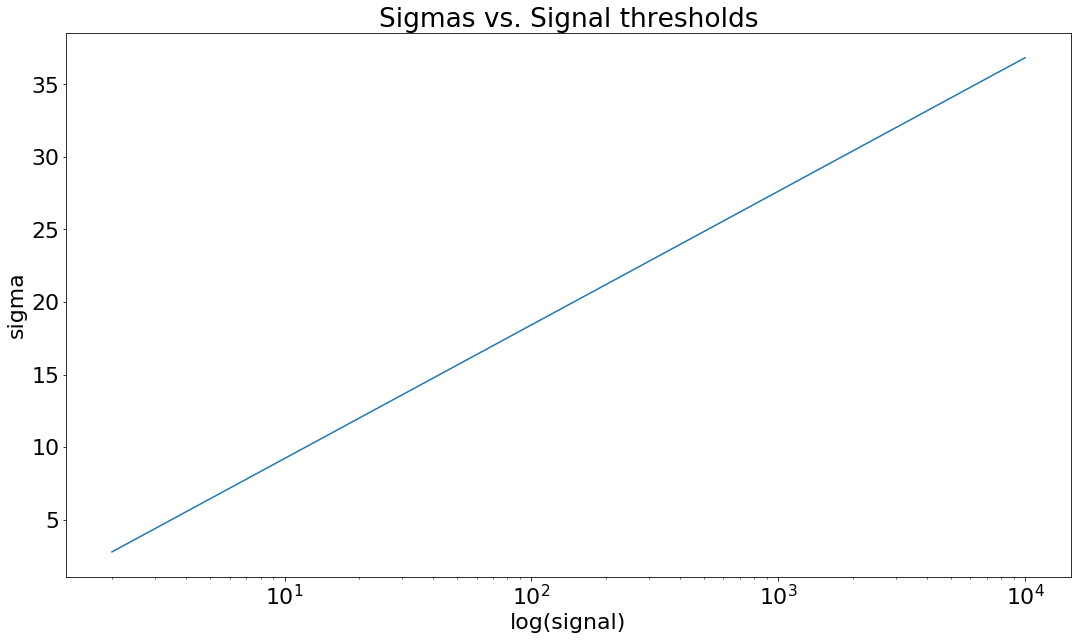

In [46]:
signals = np.linspace(2, 10000, 200)
sigmas = np.abs(stats.norm.ppf(dist.sf(signals)))

plt.title("Sigmas vs. Signal thresholds")
plt.xlabel("log(signal)")
plt.ylabel("sigma")
plt.semilogx(signals, sigmas);

This tells us that the probability (expressed as $X\sigma$) of finding a data point that is as signal-like or more signal-like than some signal threshold is linearly related to the log of the threshold. This makes sense, because the log of a lognormal distribution is normal. For example, a normally-distributed signal that is twice as far away from the mean will have a z-score that is twice as large.